### Librerías

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time


## Lectura Bases de Datos

In [96]:
# Cargar las bases de datos
alertas = pd.read_csv("Data/Alertas.csv", sep = ";", encoding = 'utf8')
chart = pd.read_csv("Data/chart.csv", sep = ";", encoding = 'utf8')
errores_de_conexion = pd.read_csv("Data/Errores de conexion.csv", sep = ";")
errores = pd.read_csv("Data/Errores.csv", sep = ";")
otros_errores = pd.read_csv("Data/Otros errores.csv", sep = ";", encoding = 'latin1')
sesiones = pd.read_csv("Data/Sesiones.csv", sep = ";")
potencia_maxima = pd.read_csv("Data/potencia-mxima-alcanzada.csv", sep = ";")

transacciones = pd.read_excel("Data/Transacciones.xlsx", sheet_name="Statistics Users")

# Análisis de cada BDD y cada variable 

## BDD Alertas
66 filas 11 columnas o variable

In [78]:
alertas.head()

,ID,Toma,RFID,Descripción,Código Error,Tiempo KO (min),Información,Solución,Autogestión,Revisado,Fecha
0,85449042,1,9D45BEFB,15 - control pilot shortcircuit - Charger Stat...,15 - control pilot shortcircuit - OtherError,NaN,Hay un cortocircuito en el piloto de control,Desconecte el conector y vuelva a conectarlo. ...,NaN,NaN,"29-04-2025, 11:56"
1,84954172,2,62AAF420,16 - control pilot no diode - Charger Status: ...,16 - control pilot no diode - OtherError,NaN,Piloto de control de EV no tiene el diodo,Code 16,NaN,NaN,"24-04-2025, 17:39"
2,83378957,2,D45E7EAF,35 - DC leakage error - Charger Status: Faulted,35 - DC leakage error - OtherError,NaN,Hay una fuga de corriente contínua,Este problema desaparecerá cuando la sesión te...,NaN,NaN,"07-04-2025, 08:58"
3,81638873,1 2,4210747D ADB2C99C,11 - open door - Charger Status: Faulted,11 - open door - OtherError,NaN,La puerta está abierta,Cierre la puerta,NaN,NaN,"13-03-2025, 13:45"
4,81637519,1 2,4210747D 9E4D5697,11 - open door - Charger Status: Faulted,11 - open door - OtherError,NaN,La puerta está abierta,Cierre la puerta,NaN,NaN,"13-03-2025, 13:14"


In [79]:
alertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               66 non-null     int64  
 1   Toma             66 non-null     object 
 2   RFID             66 non-null     object 
 3   Descripción      66 non-null     object 
 4   Código Error     66 non-null     object 
 5   Tiempo KO (min)  0 non-null      float64
 6   Información      66 non-null     object 
 7   Solución         66 non-null     object 
 8   Autogestión      0 non-null      float64
 9   Revisado         0 non-null      float64
 10  Fecha            66 non-null     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 5.8+ KB


In [80]:
alertas.describe()

,ID,Tiempo KO (min),Autogestión,Revisado
count,6.600000e+01,0.0,0.0,0.0
mean,6.826314e+07,NaN,NaN,NaN
std,9.562756e+06,NaN,NaN,NaN
min,5.543213e+07,NaN,NaN,NaN
25%,5.942903e+07,NaN,NaN,NaN
50%,6.764698e+07,NaN,NaN,NaN
75%,7.730658e+07,NaN,NaN,NaN
max,8.544904e+07,NaN,NaN,NaN


In [81]:
var = alertas['ID']
print(f"Número de elementos únicos: {var.nunique()}")
var.unique()

Número de elementos únicos: 66


array([85449042, 84954172, 83378957, 81638873, 81637519, 81636912,
       81633864, 81453742, 81093730, 80577403, 80201743, 78464253,
       77598299, 77597981, 77500538, 77462998, 77306591, 77306557,
       77183467, 76612903, 74837747, 74737200, 73795055, 73327248,
       73318302, 73318293, 71474457, 71176881, 71176771, 71142560,
       69684480, 67765877, 67694122, 67599844, 65400222, 65193529,
       65071809, 64685667, 64015781, 63746323, 62693948, 62094697,
       60603894, 60603886, 60603877, 60603161, 60319826, 60318747,
       60317476, 59132883, 59129673, 58512064, 58410570, 58410489,
       58410328, 57900319, 56252374, 56233392, 56177711, 56176742,
       55438376, 55437816, 55434000, 55433908, 55433348, 55432131],
      dtype=int64)

In [82]:
potencia_maxima

,DateTime,Potencia instantaneaToma 1 (kW),Potencia instantanea Toma 2 (kW)
0,20/1/1970 21:43,NaN,NaN
1,20/1/1970 21:43,NaN,NaN
2,20/1/1970 21:43,NaN,NaN
3,20/1/1970 21:43,NaN,NaN
4,20/1/1970 21:43,NaN,NaN
...,...,...,...
4785,30/4/2025 16:40,0.0,NaN
4786,30/4/2025 16:54,NaN,0.0
4787,30/4/2025 17:00,NaN,0.0
4788,30/4/2025 17:10,NaN,0.0


In [83]:
transacciones

,ID,RFID,Capacidad Bateria (A),Referencia,SOCKET,ENERGY (W),START SESSION,CHARGING END,SESSION END,TIME CHARGING,TIME NO CHARGING,AMOUNT
0,3744061,E2541124,18.00,C,2,8691,03/07/2024 07:09,03/07/2024 12:36,03/07/2024 12:37,327,0,NaN
1,3747743,4210747D,45.00,A,1,36194,04/07/2024 05:58,04/07/2024 11:42,04/07/2024 12:12,343,30,NaN
2,3766771,52FC1964,76.90,G,1,43690,09/07/2024 06:01,09/07/2024 13:27,09/07/2024 16:42,445,195,NaN
3,3794374,4210747D,45.00,A,2,55929,16/07/2024 05:59,16/07/2024 14:52,16/07/2024 14:52,533,0,NaN
4,3796049,E2541124,18.00,C,1,10488,16/07/2024 12:33,16/07/2024 16:50,16/07/2024 16:50,256,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
877,4968525,D45E7EAF,38.00,D,1,22871,30/04/2025 06:11,30/04/2025 10:11,30/04/2025 10:11,240,0,NaN
878,4969233,73ECE76B,30.80,E,2,9357,30/04/2025 08:27,30/04/2025 10:21,30/04/2025 11:27,113,66,NaN
879,4969805,D45E7EAF,38.00,D,1,6935,30/04/2025 10:18,30/04/2025 11:23,30/04/2025 11:42,65,18,NaN
880,4970627,07C09540,45.00,A,2,24439,30/04/2025 12:31,30/04/2025 16:22,30/04/2025 16:31,230,9,NaN


In [102]:
sesiones['Tarjeta'].nunique()

43

# Modelo de predicción de demanda por hora

In [85]:
sesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         931 non-null    int64  
 1   Minuto a minuto            931 non-null    int64  
 2   Toma                       931 non-null    int64  
 3   USER ID                    931 non-null    int64  
 4   Tarjeta                    926 non-null    object 
 5   Inicio                     931 non-null    object 
 6   Final                      931 non-null    object 
 7   Duración(mins)             931 non-null    int64  
 8   Tiempo seleccionado(mins)  395 non-null    float64
 9   Energía(kWh)               931 non-null    float64
 10  Energía seleccionada(kWh)  447 non-null    float64
 11  Modo                       931 non-null    object 
 12  costo                      0 non-null      float64
 13  Total(€)                   931 non-null    float64

In [99]:
sesiones['Inicio'] = pd.to_datetime(sesiones['Inicio'], format='%d/%m/%Y %H:%M')
sesiones['Final'] = pd.to_datetime(sesiones['Final'], format='%d/%m/%Y %H:%M')
sesiones['Hora media'] = (sesiones['Inicio'] + (sesiones['Final'] - sesiones['Inicio']) / 2).dt.time

In [108]:
sesiones['Inicio_hora'] = sesiones['Inicio'].dt.time
sesiones['Final_hora'] = sesiones['Final'].dt.time

In [117]:
sesiones[sesiones['Inicio_hora'] < time(5, 0, 0)]['Energía(kWh)'].mean()

15.00625

In [ ]:
sesiones(sesiones['Inicio'] > '2023-01-01 00:00:00')

In [119]:
sesiones

,ID,Minuto a minuto,Toma,USER ID,Tarjeta,Inicio,Final,Duración(mins),Tiempo seleccionado(mins),Energía(kWh),Energía seleccionada(kWh),Modo,costo,Total(€),Token de pago,Ref Ext 1,Ref Ext 2,Hora media,Inicio_hora,Final_hora
0,4971580,4971580,2,1131724,1EB318F9,2025-04-30 16:54:00,2025-04-30 17:10:00,16,NaN,0.00,NaN,CARD,NaN,0.0,1000097552,NaN,NaN,17:02:00,16:54:00,17:10:00
1,4970680,4970680,1,1131724,1EB318F9,2025-04-30 12:39:00,2025-04-30 16:40:00,241,NaN,6.73,10.0,APP,NaN,8754.2,---,---,---,14:39:30,12:39:00,16:40:00
2,4970627,4970627,2,1149591,07C09540,2025-04-30 12:31:00,2025-04-30 16:31:00,240,NaN,24.44,40.0,APP,NaN,31770.7,---,---,---,14:31:00,12:31:00,16:31:00
3,4969805,4969805,1,1131634,D45E7EAF,2025-04-30 10:18:00,2025-04-30 11:42:00,84,NaN,6.94,20.0,APP,NaN,9015.5,---,---,---,11:00:00,10:18:00,11:42:00
4,4969233,4969233,2,1265951,73ECE76B,2025-04-30 08:27:00,2025-04-30 11:27:00,180,180.0,9.36,NaN,APP,NaN,12164.1,---,---,---,09:57:00,08:27:00,11:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,3796049,3796049,1,981796,E2541124,2024-07-16 12:33:00,2024-07-16 16:50:00,256,NaN,10.49,NaN,OTHER,NaN,13634.4,---,NaN,NaN,14:41:30,12:33:00,16:50:00
927,3794374,3794374,2,958228,4210747D,2024-07-16 05:59:00,2024-07-16 14:52:00,533,NaN,55.93,NaN,OTHER,NaN,72707.7,---,NaN,NaN,10:25:30,05:59:00,14:52:00
928,3766771,3766771,1,958231,52FC1964,2024-07-09 06:01:00,2024-07-09 16:42:00,640,NaN,43.69,NaN,OTHER,NaN,56797.0,---,NaN,NaN,11:21:30,06:01:00,16:42:00
929,3747743,3747743,1,958228,4210747D,2024-07-04 05:58:00,2024-07-04 12:12:00,373,NaN,36.19,NaN,OTHER,NaN,47052.2,---,NaN,NaN,09:05:00,05:58:00,12:12:00


In [92]:
# Convertir la columna 'Hora media' a tipo datetime.time
sesiones['Hora media'] = pd.to_datetime(sesiones['Hora media'], format='%H:%M:%S').dt.time


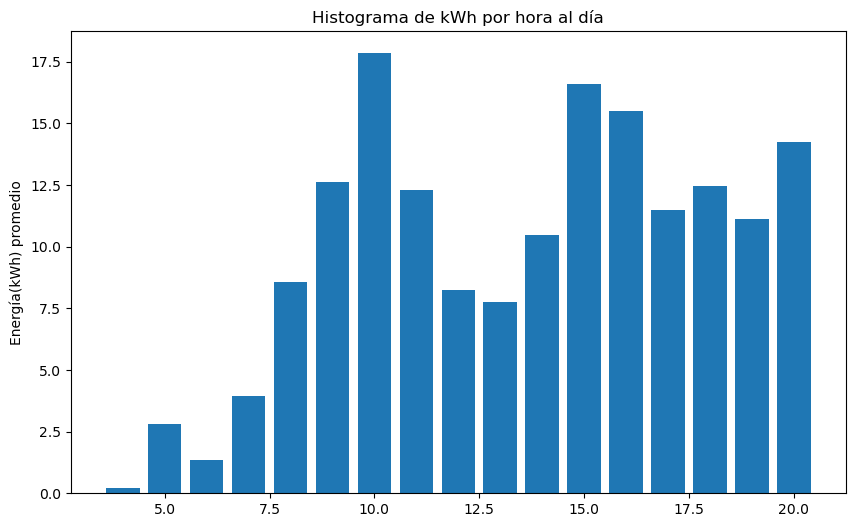

In [118]:
sesiones_por_día = sesiones.groupby(sesiones['Final'].dt.hour)['Energía(kWh)'].mean()

# Histograma de kwh por hora al día
plt.figure(figsize=(10, 6))
plt.bar(sesiones_por_día.index, sesiones_por_día.values)
plt.ylabel('Energía(kWh) promedio')
plt.title('Histograma de kWh por hora al día')
plt.show()

In [91]:
sesiones_por_día

Inicio
4     15.006250
5     20.245185
6     18.517512
7     13.731127
8     11.767143
9     11.538036
10     8.509192
11     9.938519
12    11.600278
13     9.569545
14     6.838727
15     6.114571
16     3.850909
17     6.645556
18     6.425000
19     3.620000
Name: Energía(kWh), dtype: float64